In [1]:
pip install mlxtend

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
itemsets=apriori(df,min_support=0.5,use_colnames=True)
itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(Patriot, V1_Gladiator)"


In [6]:
rules=association_rules(itemsets,metric="lift",min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [7]:
rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(Patriot),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [8]:
itemsets1=apriori(df,min_support=0.6,use_colnames=True)
itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Gladiator, Patriot)"
6,0.6,"(Gladiator, V1_Gladiator)"
7,0.6,"(Gladiator, V2_Patriot)"
8,0.6,"(Patriot, V1_Gladiator)"
9,0.6,"(V2_Patriot, Patriot)"


In [9]:
rules=association_rules(itemsets1,metric="lift",min_threshold=1.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
2,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
3,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
5,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
6,"(Gladiator, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
7,"(Gladiator, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
8,(V1_Gladiator),"(Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,(Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [10]:
rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
21,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
22,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(Gladiator, V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
25,"(Gladiator, V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(Gladiator, V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,"(Gladiator, V2_Patriot)","(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


<AxesSubplot:xlabel='support', ylabel='itemsets'>

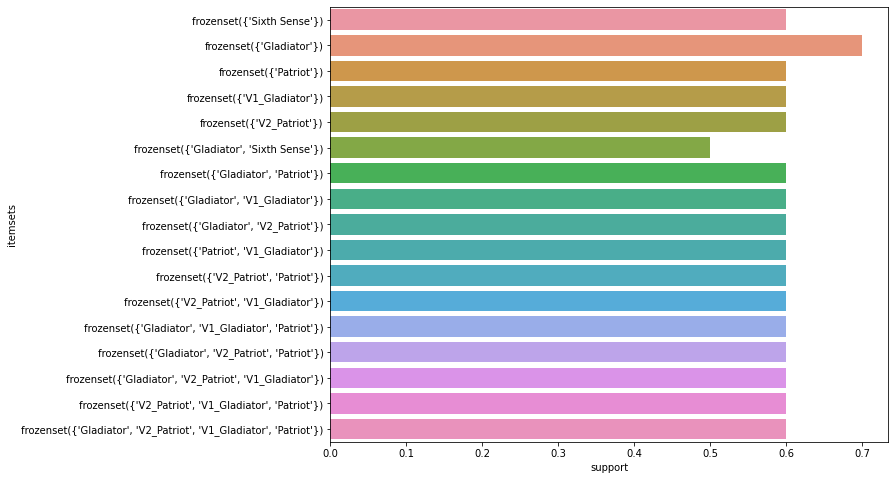

In [14]:
plt.figure(figsize= (10,8))
sns.barplot(data=itemsets,x='support',y='itemsets')

<AxesSubplot:xlabel='support', ylabel='itemsets'>

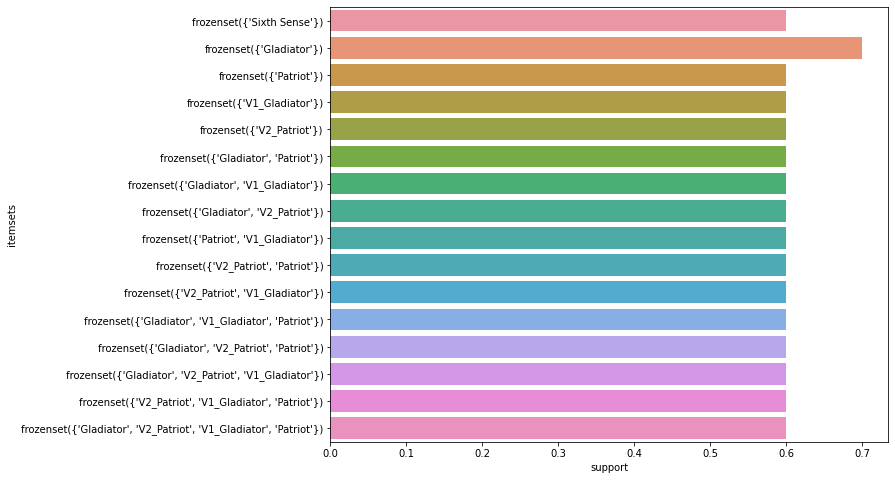

In [15]:
plt.figure(figsize= (10,8))
sns.barplot(data=itemsets1,x='support',y='itemsets')